In [1]:
# The libriaries for this experiment were imported into the python enviroment
import os

import numpy as np
import scipy as sp
import pandas as pd

import statsmodels.api as sm

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

import holoviews as hv
import hvplot.pandas

import datetime

import datashader as ds
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
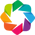

In [2]:
hv.extension('bokeh')
#hv.archive.auto() 

In [3]:
news_volume_path = os.path.join(".",'news_volume.csv')
news_volume = pd.read_csv(news_volume_path)
news_volume.columns = ['index','date']

In [4]:
news_volume['Articles'] = 1

In [5]:
news_volume = news_volume.groupby('date').sum().loc[:,['Articles']]

In [6]:
news_volume = news_volume.rolling(90).sum()

In [7]:
news_volume = news_volume.reset_index()

In [8]:
news_volume.date = pd.to_datetime(news_volume.date)

In [12]:
%%opts Scatter [width=800 height=400]
%%output filename="./media/News Volume" fig="png"
news_volume.hvplot.scatter(x='date', y='Articles')

:Scatter   [date]   (Articles)

meta data 

In [4]:
dates_path = os.path.join(".",'12_dates.csv')
dates = pd.to_datetime(pd.read_csv(dates_path).iloc[:,1])

In [5]:
portfolios_path = os.path.join(".",'13092018_portfolios.csv')
portfolios = pd.read_csv(portfolios_path).iloc[:,1:].T

association

In [6]:
association_path = os.path.join(".",'13092018_association_risk.csv')
association = pd.read_csv(association_path)

In [7]:
association = association.iloc[:-1,1:]

In [8]:
association = association**-1

In [9]:
association.index = dates

In [10]:
%%opts Histogram [width=800 height=400] 

def association_plot(time):
    return (1/association.loc[dates.loc[time],:]).hvplot.hist()

hv.DynamicMap(association_plot, kdims=['time']).redim.range(time=(0,3914))

:DynamicMap   [time]
   :Histogram   [2003-05-19 00:00:00]   (2003-05-19 00:00:00_frequency)

In [11]:
association = association.reset_index()

In [12]:
association_scatter = pd.melt(association, id_vars=['2003-05-16'])

In [13]:
association_scatter.variable = association_scatter.variable.astype(int)

In [15]:
association_scatter = association_scatter.sample(frac=0.1).merge(portfolios.T, how='left', right_index=True, left_on='variable')

In [15]:
association_scatter = association_scatter.loc[:,['2003-05-16','value']]
association_scatter.columns = ['Time', 'Association']
association_scatter.Association = association_scatter.Association

association_scatter['Time'] = pd.to_datetime(association_scatter['Time'])

In [17]:
%%opts RGB [width=800 height=400]
%%output filename="./media/Association Over Time" fig="png"
datashade(association_scatter.hvplot.scatter(x='Time', y='Association'))

:DynamicMap   []
   :RGB   [Time,Association]   (R,G,B,A)

In [16]:
var_path = os.path.join(".",'13092018_portfolio_var.csv')
var = pd.read_csv(var_path)
var = var.iloc[:,1:]

In [19]:
%%opts Histogram [width=800 height=400]

def var_plot(time):
    return var.iloc[time,:].hvplot.hist()

hv.DynamicMap(var_plot, kdims=['time']).redim.range(time=(0,3915))

:DynamicMap   [time]
   :Histogram   [0]   (0_frequency)

In [20]:
var_scatter = pd.melt(var.iloc[1:,:].reset_index(), id_vars=['index']).loc[:,['index','value']]
var_scatter.columns = ['Time', 'Std']

var_scatter['Time'] = pd.Series(np.tile(dates, var.shape[1])).values

:DynamicMap   []
   :RGB   [Time,Std]   (R,G,B,A)
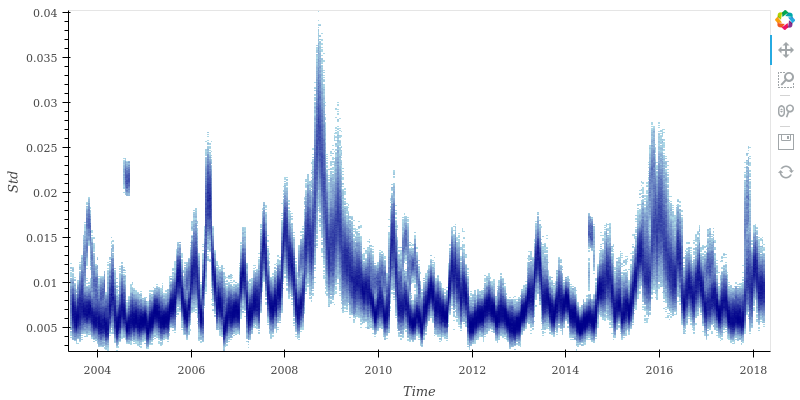

In [21]:
%%opts RGB [width=800 height=400]
%%output filename="./media/Volatility Over Time time" fig="png"

datashade(var_scatter.hvplot.scatter(x='Time', y='Std'))

# Rolling ANCOVA

In [25]:
p_values = []
coefficient =[]

for i in range(association.shape[0]-1825):
    m = association.iloc[i+1825,1:]**-1
    
    X = sm.add_constant(m.values.tolist())
    model = sm.OLS((var.iloc[i,:]).tolist(),X)
    results = model.fit()
    coefficient.append(results.params.tolist())
    p_values.append(results.pvalues.tolist())

/home/marcussky/.conda/envs/tulip/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/marcussky/.conda/envs/tulip/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/marcussky/.conda/envs/tulip/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


:Overlay
   .Curve.ANCOVA_constant_p_hyphen_minus_value                                     :Curve   [2003-05-16]   (0)
   .Curve.ANCOVA_coefficient_p_hyphen_minus_value                                  :Curve   [2003-05-16]   (1)
   .Curve.ANCOVA_coefficient_p_hyphen_minus_value_rolling_90_hyphen_minus_day_mean :Curve   [2003-05-16]   (1)
   .HLine.I                                                                        :HLine   [x,y]
   .Text.I                                                                         :Text   [x,y]
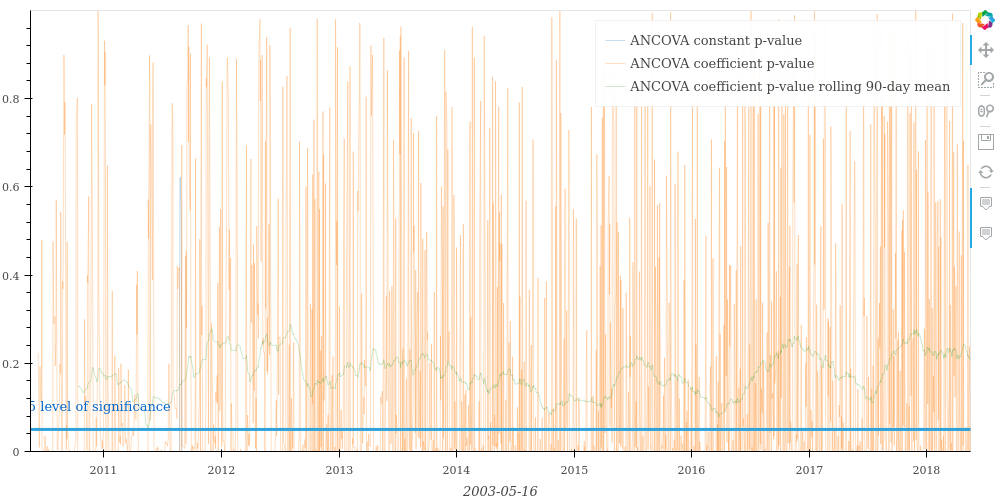

In [26]:
%%opts Curve [width=1000 height=500 tools=['hover']] (line_width=0.5 line_alpha=0.5)
%%output filename="./media/P-Values with constant over time" fig="png"
p_values_frame = pd.DataFrame(p_values).iloc[1:,:]
p_values_frame.index = dates.iloc[1825+1:]
p_values_frame.iloc[:,0].hvplot(label='ANCOVA constant p-value')   * \
p_values_frame.iloc[:,1].hvplot(label='ANCOVA coefficient p-value')   * \
p_values_frame.iloc[:,1].rolling(90).mean().hvplot(label='ANCOVA coefficient p-value rolling 90-day mean') *\
hv.HLine(0.05) * \
hv.Text(dates.quantile(0.5),0.1, "0.05 level of significance", fontsize=10).options( color='#0066CC')

In [27]:
%%opts Curve [width=1000 height=500] (line_alpha=0.5 line_width=0.5)
%%output filename="./media/Coefficients with constant over time" fig="png"
coefficient_frame = pd.DataFrame(coefficient).iloc[1:,:]
coefficient_frame.index = dates.iloc[1825+1:]
coefficient_frame.iloc[:,0].hvplot(label='ANCOVA constant') * \
coefficient_frame.iloc[:,1].hvplot(label='ANCOVA coefficient') * \
hv.VLine(pd.to_datetime('08-08-2008')) * \
hv.Text(pd.to_datetime('06-06-2008'),6e-6, "Financial Crisis", fontsize=10, rotation=90).options( color='#0066CC') *\
hv.VLine(pd.to_datetime('01-01-2016')) * \
hv.Text(pd.to_datetime('10-10-2015'),6e-6, "Zuma-Gate", fontsize=10, rotation=90).options( color='orange')

:Overlay
   .Curve.ANCOVA_constant    :Curve   [2003-05-16]   (0)
   .Curve.ANCOVA_coefficient :Curve   [2003-05-16]   (1)
   .VLine.I                  :VLine   [x,y]
   .Text.I                   :Text   [x,y]
   .VLine.II                 :VLine   [x,y]
   .Text.II                  :Text   [x,y]

# Ancova of portfolio over time with constant

In [28]:
t_p_values = []
t_coefficient =[]

for j in range(association.shape[1]-1):
    val = pd.concat([1/association.iloc[1825:,1+j], var.iloc[1825+1:,j]], axis=1).dropna(0)
    
    X = sm.add_constant(val.iloc[:,0].tolist())
    model = sm.OLS((val.iloc[:,1]).tolist(),X)
    results = model.fit()
    t_coefficient.append(results.params.tolist())
    t_p_values.append(results.pvalues.tolist())

In [29]:
%%opts Histogram [width=1000 height=500] (alpha=0.5)
%%output filename="./media/Coefficeint P-value with contant accross portfolio" fig="png"
t_values_frame = pd.DataFrame(p_values).iloc[:,:]
hv.Histogram(np.histogram(t_values_frame.iloc[:,1].dropna(), bins=100), label='ANCOVA coefficient p-value')

:Histogram   [x]   (Frequency)

In [30]:
%%opts Histogram [width=1000 height=500] (alpha=0.5)
%%output filename="./media/Constant P-value with contant accross portfolio" fig="png"
t_values_frame = pd.DataFrame(p_values).iloc[:,:]
hv.Histogram(np.histogram(t_values_frame.iloc[:,0].dropna(), bins=100), label='ANCOVA constant p-value')

:Histogram   [x]   (Frequency)

:Histogram   [x]   (Frequency)
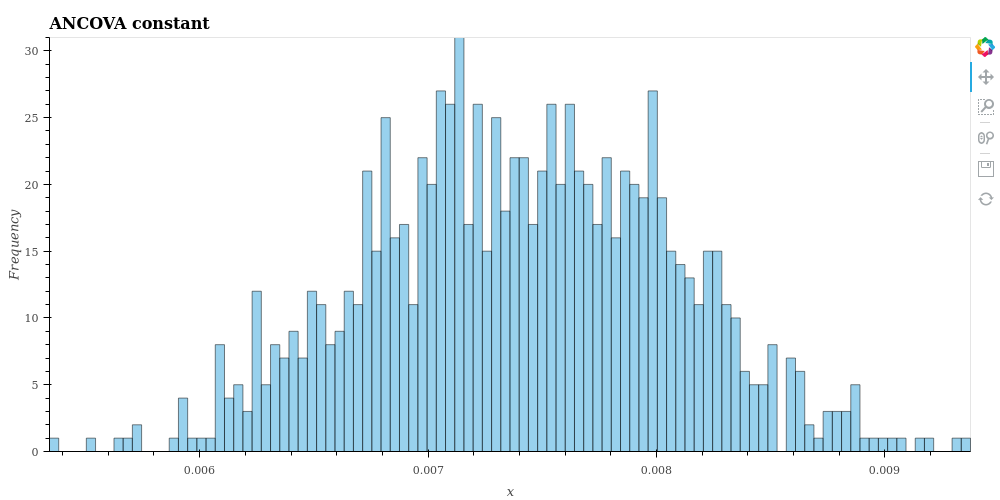

In [31]:
%%opts Histogram [width=1000 height=500] (alpha=0.5)
%%output filename="./media/Coefficeint value with contant accross portfolio" fig="png"

t_coefficient_frame = pd.DataFrame(t_coefficient).iloc[:,:]
hv.Histogram(np.histogram(t_coefficient_frame.iloc[:,0].dropna(), bins=100), label='ANCOVA constant')

:Histogram   [x]   (Frequency)
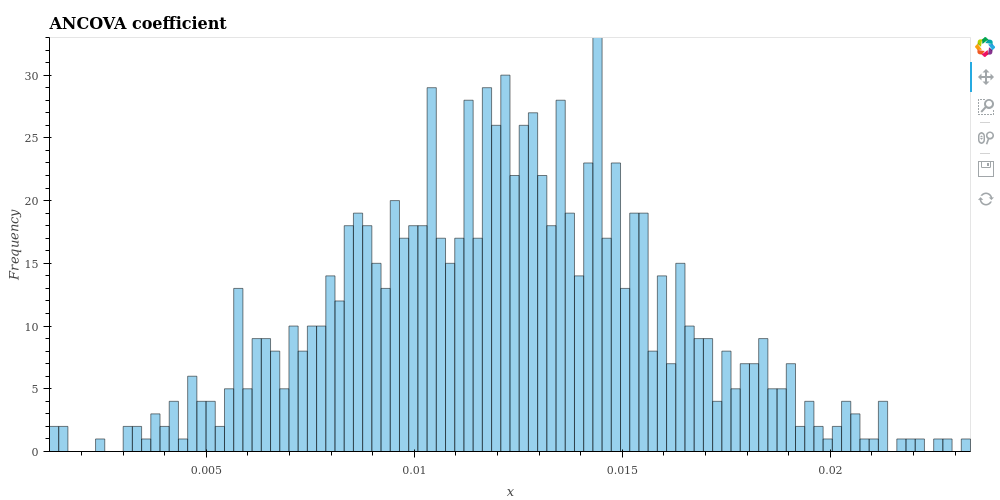

In [32]:
%%opts Histogram [width=1000 height=500] (alpha=0.5)
%%output filename="./media/Coefficeint Value with contant accross portfolio" fig="png"

hv.Histogram(np.histogram(t_coefficient_frame.iloc[:,1].dropna(), bins=100), label='ANCOVA coefficient')

# ANCOVA over time without constant

In [33]:
t_p_values = []
t_coefficient =[]

for j in range(association.shape[1]-1):
    val = pd.concat([1/association.iloc[1825:,1+j], var.iloc[1825+1:,j]], axis=1).dropna(0)
    
    X = val.iloc[:,0].tolist()
    model = sm.OLS((val.iloc[:,1]).tolist(),X)
    results = model.fit()
    t_coefficient.append(results.params.tolist())
    t_p_values.append(results.pvalues.tolist())

:Histogram   [x]   (Frequency)
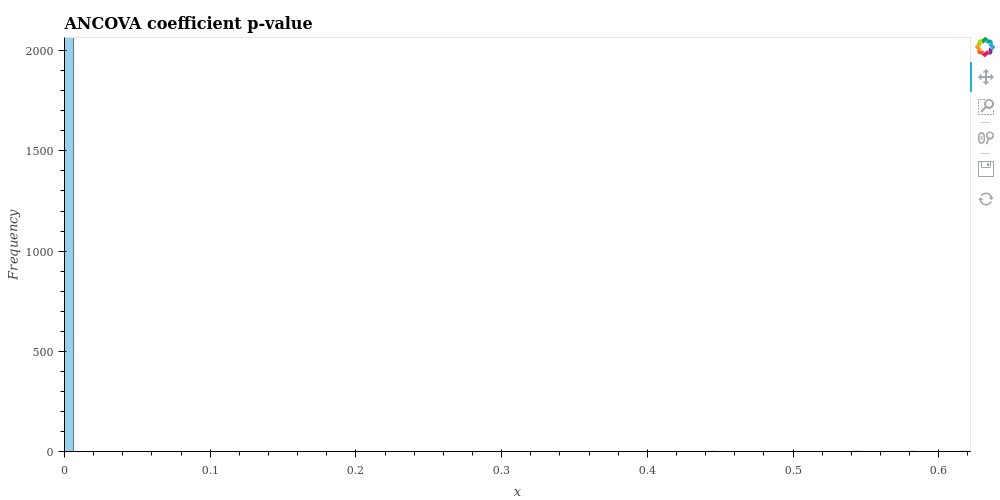

In [34]:
%%opts Histogram [width=1000 height=500] (alpha=0.5)
%%output filename="./media/Coefficeint P-value without contant accross portfolios" fig="png"
t_values_frame = pd.DataFrame(p_values).iloc[:,:]
hv.Histogram(np.histogram(t_values_frame.iloc[:,0].dropna(), bins=100), label='ANCOVA coefficient p-value')

In [35]:
%%opts Histogram [width=1000 height=500] (alpha=0.5)
%%output filename="./media/Coefficeint Value without contant accross portfolio" fig="png"

t_coefficient_frame = pd.DataFrame(t_coefficient).iloc[:,:]
hv.Histogram(np.histogram(t_coefficient_frame.iloc[:,0].dropna(), bins=100), label='ANCOVA constant')

:Histogram   [x]   (Frequency)

# Single Porfolio Example

In [45]:
val = pd.concat([1/association.iloc[1825:,1+250], var.iloc[1825+1:,250]], axis=1).dropna(0)
val.columns = ['association','volatility']

X = sm.add_constant(val.iloc[:,0].tolist())
model = sm.OLS((val.iloc[:,1]).tolist(),X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     150.8
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           1.70e-33
Time:                        17:43:13   Log-Likelihood:                 9334.1
No. Observations:                2058   AIC:                        -1.866e+04
Df Residuals:                    2056   BIC:                        -1.865e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0075      0.000     72.687      0.000       0.007       0.008
x1             0.0114      0.001     12.279      0.000       0.010       0.013
==============================================================================
Omnibus:                      227.096   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.939
Skew:                           0.874   Prob(JB):                     4.98e-68
Kurtosis:                       3.750   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#results.summary().as_latex()

In [48]:
%%opts Scatter [width=1000 height=500]
%%output filename="./media/Scatter Plot of Residuals of 500th Portofolio" fig="png"

pd.concat([pd.DataFrame(results.resid, columns=['residuals']).reset_index().loc[:,['residuals']], val.loc[:,['association']].reset_index().loc[:,['association']]], axis=1).hvplot.scatter(y='residuals', x='association', label='Residuals of 500th Portfolio', size=4)

:Scatter   [association]   (residuals)

In [49]:
%%opts Histogram [width=1000 height=500]
%%output filename="./media/Histogram of Residuals of 500th Portofolio" fig="png"

pd.DataFrame(results.resid, columns=['residuals']).hvplot.hist(label='Distribution of Errors')

:Histogram   [residuals]   (residuals_frequency)

:Scatter   [association]   (volatility)
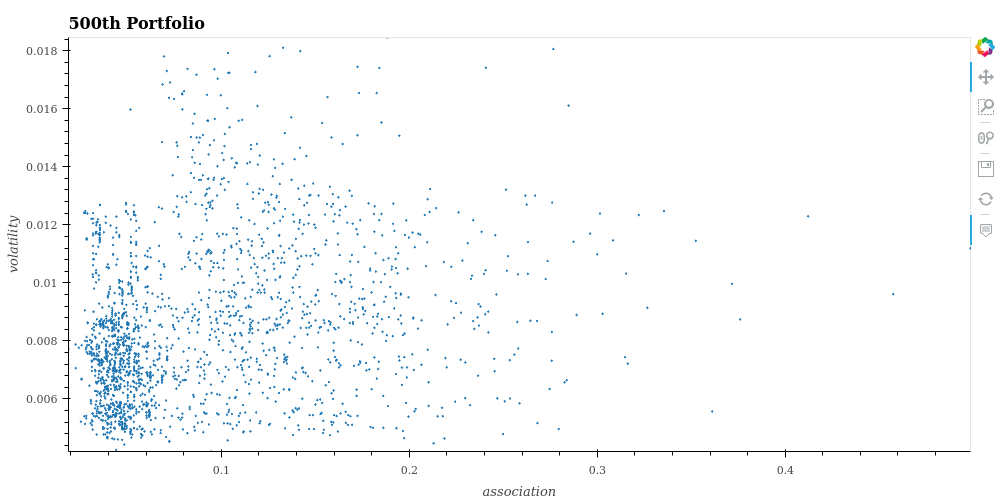

In [38]:
%%opts Scatter [width=1000 height=500]
%%output filename="./media/Scatter Plot of 500th Portofolio" fig="png"

val.hvplot.scatter(x='association',y='volatility', label='500th Portfolio', size=3)

# Single Point in Time

![image](./media/Association Computation Diagram.png)

In [42]:
val = pd.concat([1/association.iloc[1825+1003,1:], var.iloc[1825+1004,:]], axis=1).dropna(0)
val.columns = ['association','volatility']

In [43]:
X = sm.add_constant(val.iloc[:,0].tolist())
model = sm.OLS((val.iloc[:,1]).tolist(),X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.486
Date:                Mon, 17 Sep 2018   Prob (F-statistic):             0.0344
Time:                        17:42:21   Log-Likelihood:                 5684.4
No. Observations:                1000   AIC:                        -1.136e+04
Df Residuals:                     998   BIC:                        -1.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.000     32.799      0.000       0.005       0.006
x1             0.0064      0.003      2.118      0.034       0.000       0.012
==============================================================================
Omnibus:                        0.648   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.724
Skew:                           0.005   Prob(JB):                        0.696
Kurtosis:                       2.869   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#pd.Series(results.summary().as_html()).str.replace('\n','')[0]

:Scatter   [association]   (volatility)
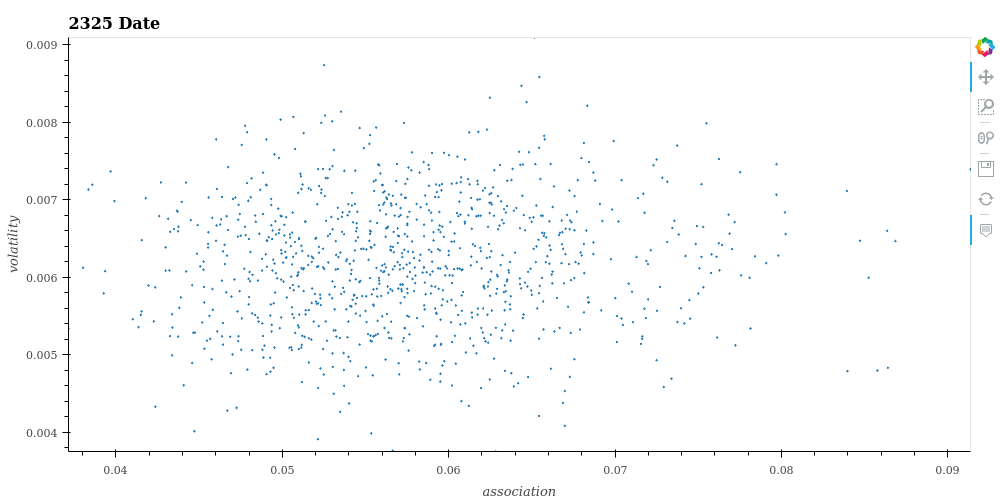

In [41]:
%%opts Scatter [width=1000 height=500]
%%output filename="./media/Scatter Plot of Portfolios on 2014-03-21" fig="png"

val.hvplot.scatter(x='association',y='volatility', label='2325 Date', size=3)

In [44]:
%%opts Histogram [width=1000 height=500]
%%output filename="./media/Histogram of Residuals of of Portfolios on 2014-03-21" fig="png"

pd.DataFrame(results.resid, columns=['residuals']).hvplot.hist(label='Distribution of Errors')

:Histogram   [residuals]   (residuals_frequency)

In [42]:
%%opts Scatter [width=1000 height=500]
%%output filename="./media/Scatter Plot of Residuals of Portfolios on 2014-03-21" fig="png"

pd.concat([pd.DataFrame(results.resid, columns=['residuals']).reset_index().loc[:,['residuals']], val.reset_index().loc[:,['association']]], axis=1).hvplot.scatter(y='residuals', x='association', label='Residuals of Portfolios on 2014-03-21', size=4)

:Scatter   [association]   (residuals)

# Complete Model

metadata

In [3]:
portfolios_path = os.path.join(".",'13092018_portfolios.csv')
portfolios = pd.read_csv(portfolios_path).iloc[:,1:].T

In [4]:
dates_path = os.path.join(".",'12_dates.csv')
dates = pd.to_datetime(pd.read_csv(dates_path).iloc[-500:,1])#.iloc[-500:,1])

association

In [5]:
association_path = os.path.join(".",'13092018_association_risk.csv')
association = pd.read_csv(association_path).iloc[:,1:]

In [6]:
association = association.iloc[:,:]

In [7]:
association.loc[:,'dates'] = dates

In [8]:
association = pd.melt(association, 'dates')

In [9]:
association.loc[:,['dates', 'variable']] = association.loc[:,['dates', 'variable']].astype(str)

In [10]:
association = pd.merge(association, portfolios, how='left', left_on='variable', right_index=True)

volatility

In [11]:
var_path = os.path.join(".",'13092018_portfolio_var.csv')
var = pd.read_csv(var_path).iloc[:,:]

In [12]:
var = pd.melt(var, 'Unnamed: 0')

In [13]:
var.loc[:,['Unnamed: 0', 'variable']] = var.loc[:,['Unnamed: 0', 'variable']].astype(str)

join

In [14]:
joined = pd.merge(association, var, how='inner', left_on=['dates', 'variable'], right_on=['Unnamed: 0', 'variable'])

In [15]:
del association, var

In [16]:
joined = joined.dropna(0).sample(frac=0.05)

In [17]:
joined['association'] = joined.value_x

In [18]:
x = pd.concat([joined.loc[:,['association']]**-1, pd.get_dummies(joined.dates), joined.drop(columns=['value_x','variable','dates', 'association', 'Unnamed: 0', 'value_y',])], axis=1)

In [19]:
#x = x.reset_index()

In [20]:
#x['association * time'] = x.index * x.association

In [21]:
x['bias'] = 1

Model estimation

In [22]:
model = sm.OLS(joined.iloc[:,:].value_y,x.iloc[:,:])

clean wordspace

In [23]:
del joined, x

estimation

$\beta$

In [24]:
#Final two years
# results = model.fit()
# results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                value_y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1170.
Date:                Tue, 18 Sep 2018   Prob (F-statistic):               0.00
Time:                        01:42:49   Log-Likelihood:             2.3668e+06
No. Observations:              469000   AIC:                        -4.732e+06
Df Residuals:                  468449   BIC:                        -4.726e+06
Df Model:                         550                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
association     0.0003   5.32e-05      4.968      0.000       0.000       0.000
2016-06-17      0.0038   4.95e-05     75.797      0.000       0.004       0.004
2016-06-20      0.0039   4.92e-05     78.994      0.000       0.004       0.004
2016-06-21      0.0038   4.92e-05     77.515      0.000       0.004       0.004
2016-06-22      0.0038   4.92e-05     78.214      0.000       0.004       0.004
2016-06-23      0.0027   4.93e-05     55.704      0.000       0.003       0.003
2016-06-24      0.0008   4.93e-05     16.030      0.000       0.001       0.001
2016-06-27   6.673e-06   5.08e-05      0.131      0.895   -9.29e-05       0.000
2016-06-28     -0.0001   4.92e-05     -2.831      0.005      -0.000   -4.29e-05
2016-06-29     -0.0003   4.94e-05     -6.575      0.000      -0.000      -0.000
2016-06-30     -0.0003   4.92e-05     -7.034      0.000      -0.000      -0.000
2016-07-01     -0.0003   4.93e-05     -6.027      0.000      -0.000      -0.000
2016-07-04     -0.0007   4.92e-05    -13.610      0.000      -0.001      -0.001
2016-07-05     -0.0008   4.93e-05    -16.383      0.000      -0.001      -0.001
2016-07-06     -0.0006   4.92e-05    -12.829      0.000      -0.001      -0.001
2016-07-07     -0.0005   4.92e-05    -10.632      0.000      -0.001      -0.000
2016-07-08     -0.0010   4.92e-05    -20.843      0.000      -0.001      -0.001
2016-07-11     -0.0011   4.97e-05    -21.498      0.000      -0.001      -0.001
2016-07-12     -0.0009   4.93e-05    -18.372      0.000      -0.001      -0.001
2016-07-13     -0.0009   4.94e-05    -18.630      0.000      -0.001      -0.001
2016-07-14     -0.0010   4.92e-05    -19.597      0.000      -0.001      -0.001
2016-07-15     -0.0009   4.92e-05    -17.614      0.000      -0.001      -0.001
2016-07-18     -0.0008   4.92e-05    -17.263      0.000      -0.001      -0.001
2016-07-19     -0.0002   4.92e-05     -4.823      0.000      -0.000      -0.000
2016-07-20     -0.0003   4.93e-05     -6.342      0.000      -0.000      -0.000
2016-07-21      0.0004   4.92e-05      7.457      0.000       0.000       0.000
2016-07-22      0.0002   4.92e-05      4.477      0.000       0.000       0.000
2016-07-25      0.0003   4.92e-05      6.507      0.000       0.000       0.000
2016-07-26      0.0003   4.92e-05      6.414      0.000       0.000       0.000
2016-07-27      0.0003   4.92e-05      5.371      0.000       0.000       0.000
2016-07-28      0.0003   4.92e-05      6.753      0.000       0.000       0.000
2016-07-29      0.0005   4.93e-05      9.567      0.000       0.000       0.001
2016-08-01      0.0004   4.92e-05      7.165      0.000       0.000       0.000
2016-08-02      0.0004   4.93e-05      8.242      0.000       0.000       0.001
2016-08-03      0.0003   4.93e-05      6.180      0.000       0.000       0.000
2016-08-04      0.0003   4.95e-05      6.64

In [131]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                value_y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     182.6
Date:                Mon, 17 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:56:13   Log-Likelihood:             6.2152e+05
No. Observations:              123450   AIC:                        -1.238e+06
Df Residuals:                  120899   BIC:                        -1.213e+06
Df Model:                        2550                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
association     0.0007      0.000      3.529      0.000       0.000       0.001
2008-10-17      0.0147      0.000     68.352      0.000       0.014       0.015
2008-10-20      0.0147      0.000     56.307      0.000       0.014       0.015
2008-10-21      0.0135      0.000     55.509      0.000       0.013       0.014
2008-10-22      0.0142      0.000     57.134      0.000       0.014       0.015
2008-10-23      0.0135      0.000     55.449      0.000       0.013       0.014
2008-10-24      0.0132      0.000     64.336      0.000       0.013       0.014
2008-10-27      0.0135      0.000     58.063      0.000       0.013       0.014
2008-10-28      0.0120      0.000     52.368      0.000       0.012       0.012
2008-10-29      0.0126      0.000     56.634      0.000       0.012       0.013
2008-10-30      0.0113      0.000     49.051      0.000       0.011       0.012
2008-10-31      0.0119      0.000     49.960      0.000       0.011       0.012
2008-11-03      0.0109      0.000     47.979      0.000       0.010       0.011
2008-11-04      0.0114      0.000     53.151      0.000       0.011       0.012
2008-11-05      0.0112      0.000     54.153      0.000       0.011       0.012
2008-11-06      0.0106      0.000     48.682      0.000       0.010       0.011
2008-11-07      0.0106      0.000     46.607      0.000       0.010       0.011
2008-11-10      0.0099      0.000     44.663      0.000       0.009       0.010
2008-11-11      0.0097      0.000     43.743      0.000       0.009       0.010
2008-11-12      0.0100      0.000     42.785      0.000       0.010       0.011
2008-11-13      0.0097      0.000     42.708      0.000       0.009       0.010
2008-11-14      0.0088      0.000     35.684      0.000       0.008       0.009
2008-11-17      0.0095      0.000     42.558      0.000       0.009       0.010
2008-11-18      0.0088      0.000     38.416      0.000       0.008       0.009
2008-11-19      0.0077      0.000     32.667      0.000       0.007       0.008
2008-11-20      0.0076      0.000     32.051      0.000       0.007       0.008
2008-11-21      0.0069      0.000     30.376      0.000       0.006       0.007
2008-11-24      0.0075      0.000     32.067      0.000       0.007       0.008
2008-11-25      0.0068      0.000     31.130      0.000       0.006       0.007
2008-11-26      0.0062      0.000     31.655      0.000       0.006       0.007
2008-11-27      0.0069      0.000     35.640      0.000       0.007       0.007
2008-11-28      0.0053      0.000     21.439      0.000       0.005       0.006
2008-12-01      0.0062      0.000     26.923      0.000       0.006       0.007
2008-12-02      0.0063      0.000     28.155      0.000       0.006       0.007
2008-12-03      0.0066      0.000     30.975      0.000       0.006       0.007
2008-12-04      0.0070      0.000     31.45

In [132]:
file = open("blocking summary html.txt","w") 
file.write(results.summary().as_html())
file.close() 

file = open("blocking summary latex.txt","w") 
file.write(results.summary().as_latex())
file.close() 

In [133]:
blocking_residuals = pd.DataFrame(results.resid, columns=['residuals']).reset_index()

:Scatter   [association]   (residuals)
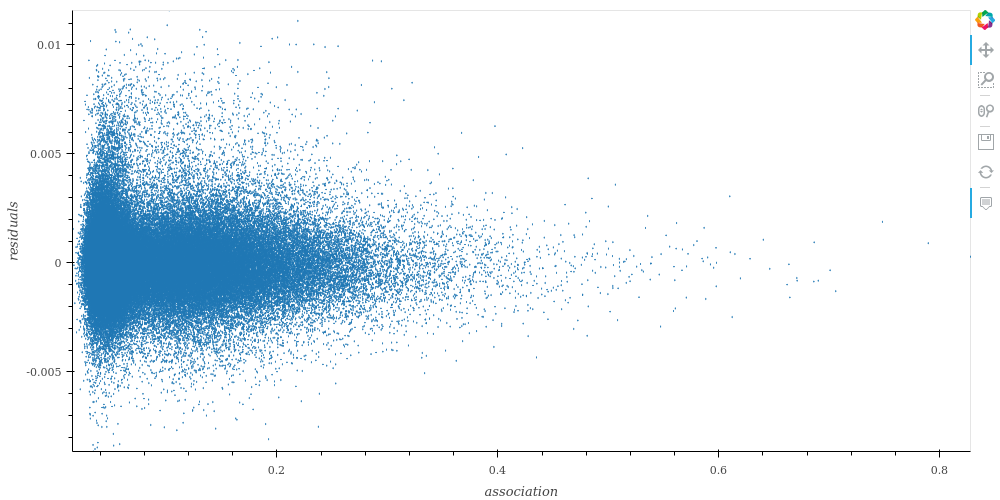

In [134]:
%%opts Scatter [width=1000 height=500]
%%output filename="./media/Scatter Plot of Residuals of Blocking Ancova" fig="png"

pd.concat([blocking_residuals, pd.DataFrame(model.data.exog[:,0], columns=['association'])], axis=1).hvplot.scatter(y='residuals', x='association', size=1)

:Histogram   [residuals]   (residuals_frequency)
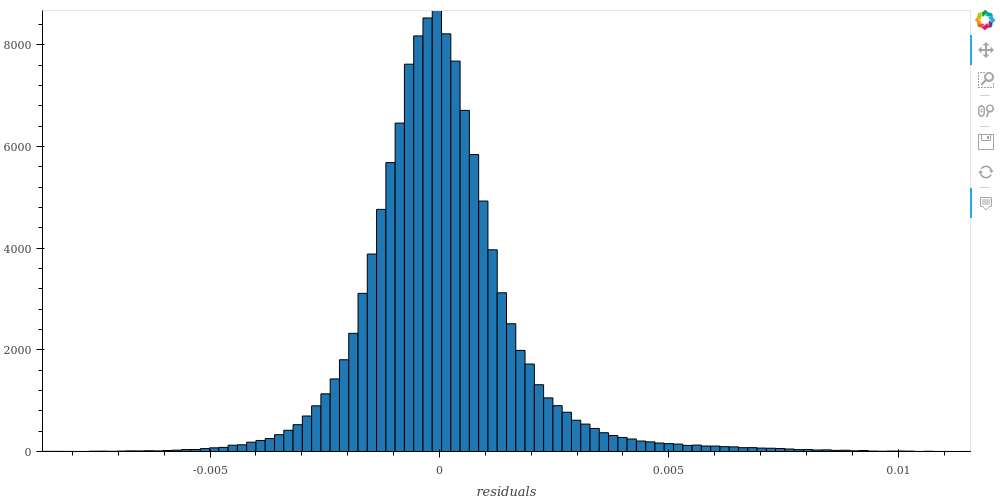

In [135]:
%%opts Histogram [width=1000 height=500]
%%output filename="./media/Histogram of Residuals of Blocking Ancova" fig="png"

blocking_residuals.hvplot.hist(bins=100)

In [136]:
blocking_pvalues = pd.DataFrame(results.pvalues, columns=['p-value'])

:Scatter   [dates]   (p-value)
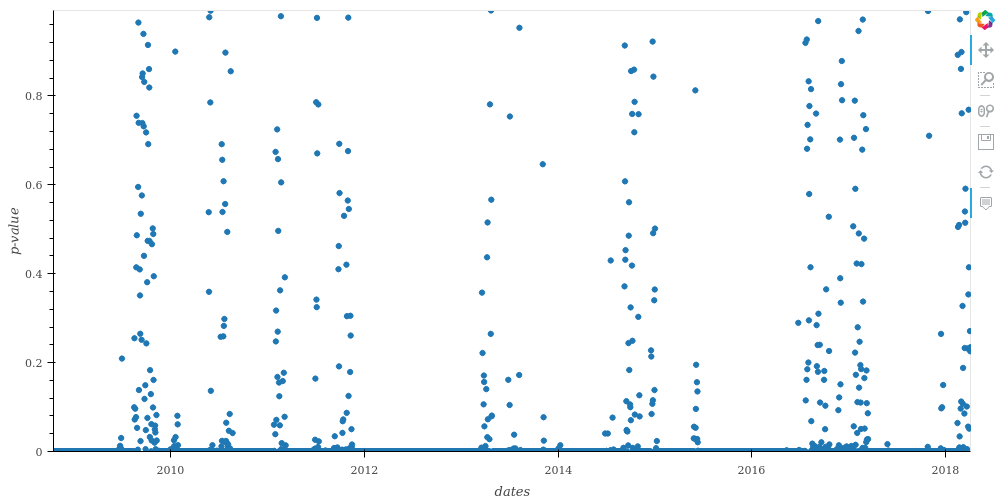

In [137]:
%%opts Scatter [width=1000 height=500]
%%output filename="./media/Scatter Plot of P-values for dates of Blocking Ancova" fig="png"

dates_pvalues = pd.merge(pd.DataFrame(dates.dt.date.astype(str).values, columns=['dates']), blocking_pvalues, how='left', left_on='dates', right_index=True).dropna()
dates_pvalues.dates = pd.to_datetime(dates_pvalues.dates)
    
dates_pvalues.hvplot.scatter(x='dates', y='p-value')

:Scatter   [share]   (p-value)
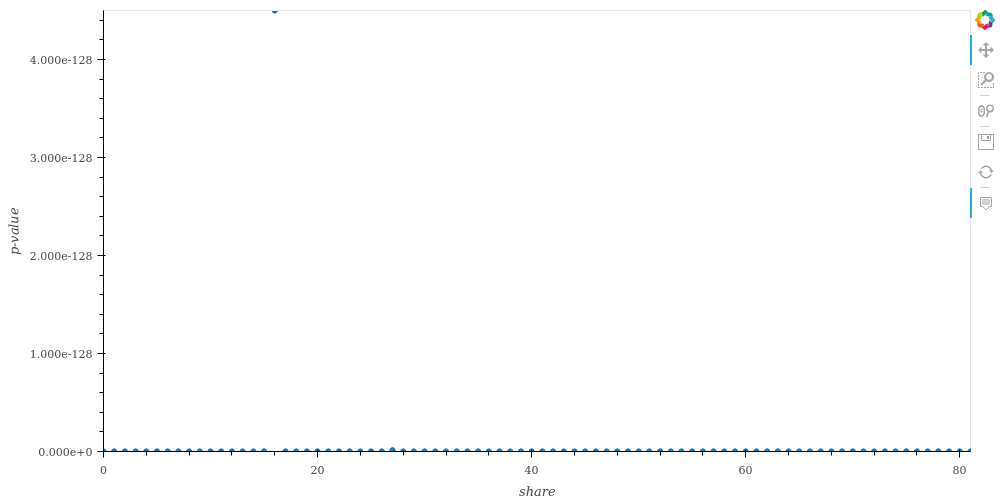

In [138]:
%%opts Scatter [width=1000 height=500]
%%output filename="./media/Scatter Plot of P-values for shares in a portfolio of Blocking Ancova" fig="png"

shares_pvalues = blocking_pvalues.iloc[-83:-1].reset_index()

shares_pvalues.columns =  ['share','p-value']

    
shares_pvalues.hvplot.scatter(x='share', y='p-value')

# Time Backtesting

In [3]:
# association_path = os.path.join(".",'13092018_association_risk.csv')
# association = pd.read_csv(association_path).iloc[:,1:]

In [4]:
# var_path = os.path.join(".",'13092018_portfolio_var.csv')
# var = pd.read_csv(var_path).iloc[:,1:]

In [32]:
# tscv = TimeSeriesSplit(n_splits=10)

# X = association.iloc[1825:2058,:].reset_index(drop=True)
# y = var.iloc[1825:2058,:].reset_index(drop=True)

# scores = []
# for train_index, test_index in tscv.split(X.iloc[:,1]):
#     portfolios = []
#     for portfolio in range(X.shape[1]):
#         X_train, X_test = X.iloc[train_index, portfolio], X.iloc[test_index, portfolio]
#         y_train, y_test = y.iloc[train_index, portfolio], y.iloc[test_index, portfolio]
        
#         lm = LinearRegression()
        
#         lm.fit(X=X_train.values.reshape(-1, 1), y=y_train.values.reshape(-1, 1))
        
#         R2 = lm.score(X=X_test.values.reshape(-1, 1), y=y_test.values.reshape(-1, 1))
    
#         portfolios.append(R2)
#     scores.append(portfolios)

In [33]:
# scores = pd.DataFrame(scores).reset_index()

# scores_melt = pd.melt(scores, id_vars=['index']).loc[:,['index','value']]
# scores_melt.columns = ['Time Split','R2']

In [ ]:
# %%output filename="./media/R2 over Time" fig="png"

# hv.Scatter(scores_melt, kdims='Time Split', vdims='R2').options(width=800, height=400)

Association Computation Diagram

|                   |                  | table 4    |          |                   |            |        |  
|-------------------|------------------|------------|----------|-------------------|------------|--------|  
| Dep. Variable     | y                |            |          | R-squared         | 0.794      |        |  
| Method:           | Least Squares    |            |          | Adj. R-squared    | 0.790      |        |  
| No. Observations: | 123450           |            |          | F-statistic       | 182.6      |        |  
| DF Residuals:     | 120899           |            |          | Prob(F-statistic) | 0.000      |        |  
| Df Model:         | 2550             |            |          | Log-likelihood    | 6.2152e+05 |        |  
| Covariance type   | non-robust       |            |          | AIC:              | -1.238e+64 |        |  
| Date              | Mon, 17 Sep 2018 |            |          | BIC:              | -1.213e+06 |        |  
| Time              | 23:56:13         |            |          |                   |            |        |  
|                   | Coef             | std err    | t        | $p>|t|   $          | [0.025     | 0.975] |  
| Association       | 0.007            | 0.000      | 3.529    | 0.000             | 0.000      | 0.001  |  
| ...               |                  |            |          |                   |            |        |  
| Constant          | 0.0024           | 4.84e-06   | 500.510  | 0.000             | 0.002      | 0.002      |  
|                   |                  |            |          |                   |            |        |  
| Omnibus:          | 25356.151        | Skew:      | 0.933    | Dubin-Watson      | 1.999      |          |  
| Prob(Omnibus):    | 0.000            | Kurtosis:  | 7.402    | Jarque-Bera (JB): |117583.806 |        |
| Prob(JB):         | 0.000            | Cond. No.  | 1.72e+17 |                   |            |        |  


![image](./media/Association_Computation_Diagram.png "Voyage to the moon")\

[tsne_diagram]: ./media/Association_Computation_Diagram.png "Diagram of  TSNE Plot with" 
![Alt text][some_tag] 
A reference to the [TSNE Diagram](#some_tag).

![This is the caption\label{mylabel}](./media/Association_Computation_Diagram.png)
See figure [TSNE Diagram](mylabel).

 ![Caption.](./media/Association_Computation_Diagram.png)

[TSNE Diagram](Caption.)